In [1]:
# watch this: https://www.youtube.com/watch?v=iFTWM7HV2UI
# your cleaned data after you complete this analysis: 
# upload to: https://docs.google.com/forms/d/e/1FAIpQLScVuy4aSiSSpLfUOxbmutWtcUidfkzPDc-C0J2gy6Y8TXqeHQ/viewform

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('history_cleaned.csv')
df.shape

(3983, 2)

In [3]:
df.head()

,Time,domain
0,2022-01-19 23:19:37,kite.zerodha.com
1,2022-01-19 23:30:38,kite.zerodha.com
2,2022-01-19 23:30:51,edis.cdslindia.com
3,2022-01-19 23:30:57,edis.cdslindia.com
4,2022-01-19 23:31:05,www.google.com


In [4]:
df.isna().sum()

Time      0
domain    0
dtype: int64

In [6]:
df.dropna( inplace=True)

In [7]:
df.dtypes

Time      object
domain    object
dtype: object

In [8]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

0

In [9]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [10]:
df['Time'] = pd.to_datetime(df['Time'])

In [11]:
df.dtypes

Time      datetime64[ns]
domain            object
dtype: object

In [12]:
df.head()

,Time,domain
0,2022-01-19 23:19:37,kite.zerodha.com
1,2022-01-19 23:30:38,kite.zerodha.com
2,2022-01-19 23:30:51,edis.cdslindia.com
3,2022-01-19 23:30:57,edis.cdslindia.com
4,2022-01-19 23:31:05,www.google.com


In [13]:
df['domain'].value_counts()[:50]

www.google.com                                                   960
github.com                                                       641
webauth.umbc.edu                                                 605
blackboard.umbc.edu                                              309
my.umbc.edu                                                      231
mail.google.com                                                  150
kite.zerodha.com                                                  57
www.youtube.com                                                   56
csprd-web.ps.umbc.edu                                             47
cgifederal.secure.force.com                                       41
myactivity.google.com                                             40
accounts.google.com                                               26
web.whatsapp.com                                                  25
myaccount.google.com                                              25
libgen.li                         

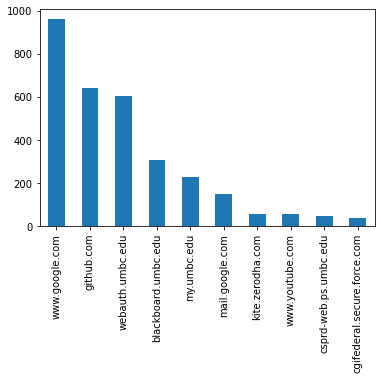

In [14]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar') 

In [15]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0     234
1      81
2      50
3      52
4      51
5      21
8      34
9      75
10    104
11    155
12    310
13    295
14    224
15    266
16    173
17    128
18    154
19    502
20    265
21    331
22    249
23    229
Name: domain, dtype: int64

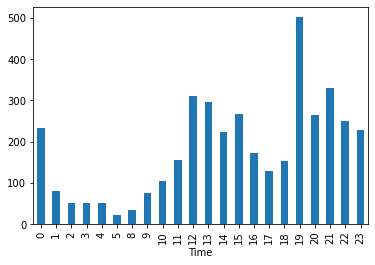

In [16]:
hourly_counts.plot.bar()

In [17]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2022-01-19 23:19:37,kite.zerodha.com,Wednesday,2
1,2022-01-19 23:30:38,kite.zerodha.com,Wednesday,2
2,2022-01-19 23:30:51,edis.cdslindia.com,Wednesday,2
3,2022-01-19 23:30:57,edis.cdslindia.com,Wednesday,2
4,2022-01-19 23:31:05,www.google.com,Wednesday,2


In [18]:
df['Day'].value_counts()

Sunday       1150
Tuesday       827
Thursday      523
Monday        504
Wednesday     358
Saturday      326
Friday        295
Name: Day, dtype: int64

In [19]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0     504
1     827
2     358
3     523
4     295
5     326
6    1150
Name: DayIndex, dtype: int64

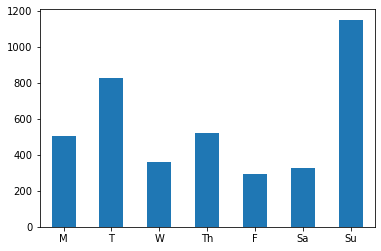

In [20]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [21]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2022-01-19 23:19:37,kite.zerodha.com,Wednesday,2,False
1,2022-01-19 23:30:38,kite.zerodha.com,Wednesday,2,False
2,2022-01-19 23:30:51,edis.cdslindia.com,Wednesday,2,False
3,2022-01-19 23:30:57,edis.cdslindia.com,Wednesday,2,False
4,2022-01-19 23:31:05,www.google.com,Wednesday,2,False


In [22]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
86,2022-01-22 14:40:00,www.google.com,Saturday,5,True
87,2022-01-22 14:41:24,sbs.umbc.edu,Saturday,5,True
88,2022-01-22 14:46:21,mail.google.com,Saturday,5,True
89,2022-01-22 14:46:31,webauth.umbc.edu,Saturday,5,True
90,2022-01-22 14:46:33,webauth.umbc.edu,Saturday,5,True


In [23]:
weekday['domain'].value_counts()[:5]

www.google.com         524
webauth.umbc.edu       390
github.com             377
blackboard.umbc.edu    175
my.umbc.edu            171
Name: domain, dtype: int64

In [24]:
weekend['domain'].value_counts()[:5]

www.google.com         436
github.com             264
webauth.umbc.edu       215
blackboard.umbc.edu    134
my.umbc.edu             60
Name: domain, dtype: int64

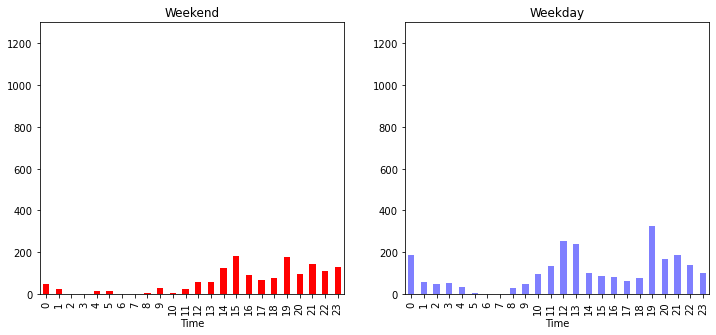

In [25]:
def show_stats(df, color, alpha=1, title='', fig=None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.title(title)
    plt.ylim([0, 1300])
    

plt.figure(figsize=(12, 5))
show_stats( weekend, 'red', 1, 'Weekend', 1)
    
show_stats( weekday, 'blue', 0.5, 'Weekday', 2)

plt.show()


In [ ]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply because there are more weekdays 

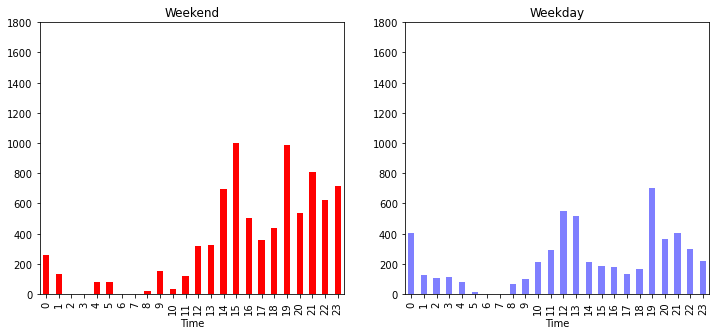

In [26]:
def show_stats(df, color, alpha=1, title='', fig=None, y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
           
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)


plt.figure(figsize=(12, 5))

y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend',fig=1, y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday',fig=2, y_lim=y_lim)

plt.show()

In [27]:
df['domain'].value_counts()[:10]

www.google.com                 960
github.com                     641
webauth.umbc.edu               605
blackboard.umbc.edu            309
my.umbc.edu                    231
mail.google.com                150
kite.zerodha.com                57
www.youtube.com                 56
csprd-web.ps.umbc.edu           47
cgifederal.secure.force.com     41
Name: domain, dtype: int64

In [28]:
def get_data_for_domain(val):
    return df[df['domain'].str.lower().str.contains(val.lower(), regex=True)]

# get_data_for_domain('youtube')

In [29]:
def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

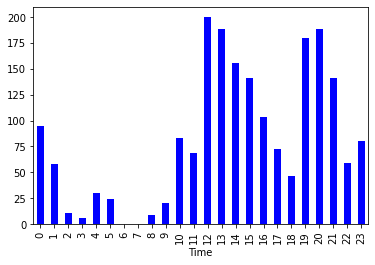

In [37]:
_= show_domain_stats('google', 'blue')

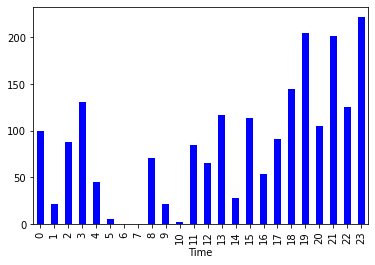

In [38]:
_= show_domain_stats('zerodha|github', 'blue')

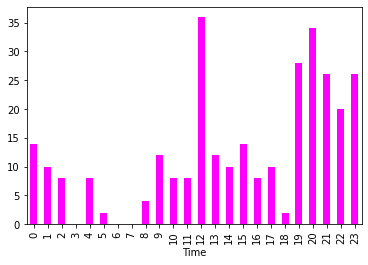

In [40]:
_ = show_domain_stats('mail', 'magenta')


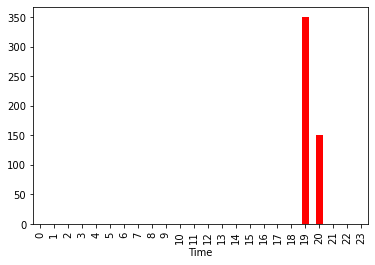

In [34]:
_ = show_domain_stats('netflix', 'red')

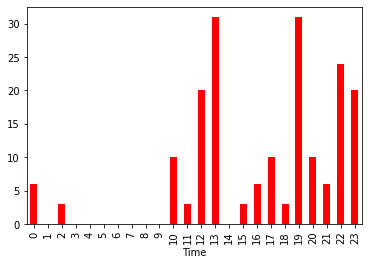

In [39]:
_ = show_domain_stats('youtube', 'red')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is she employed?
1. What are her interests?
1. Anything interesting? 

1.It is her personal computer.

2.She might be employed back in india as she own few stocks in zerodha,currently she is student in umbc.

3.Through the websites "zerodha" and "banking" she is intrested in finance and she is also studious that can be concluded with my umbc websites and edis.cdsl scholorship websites. 

4.Back in India she used to work as she own few stocks there and now she is trying for on-campus job that can be concluded with myumbc.works website.